In [108]:
from scipy.fftpack import fft, dct, idct, ifft

In [109]:
import numpy as np
import struct
filename_seismic_query = 'seismic-query_size100_len256_znorm.bin'
with open(filename_seismic_query, 'rb') as in_file:
    time_series_seismic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

In [110]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))

In [111]:
i = 1
x = time_series_seismic_query[i,]

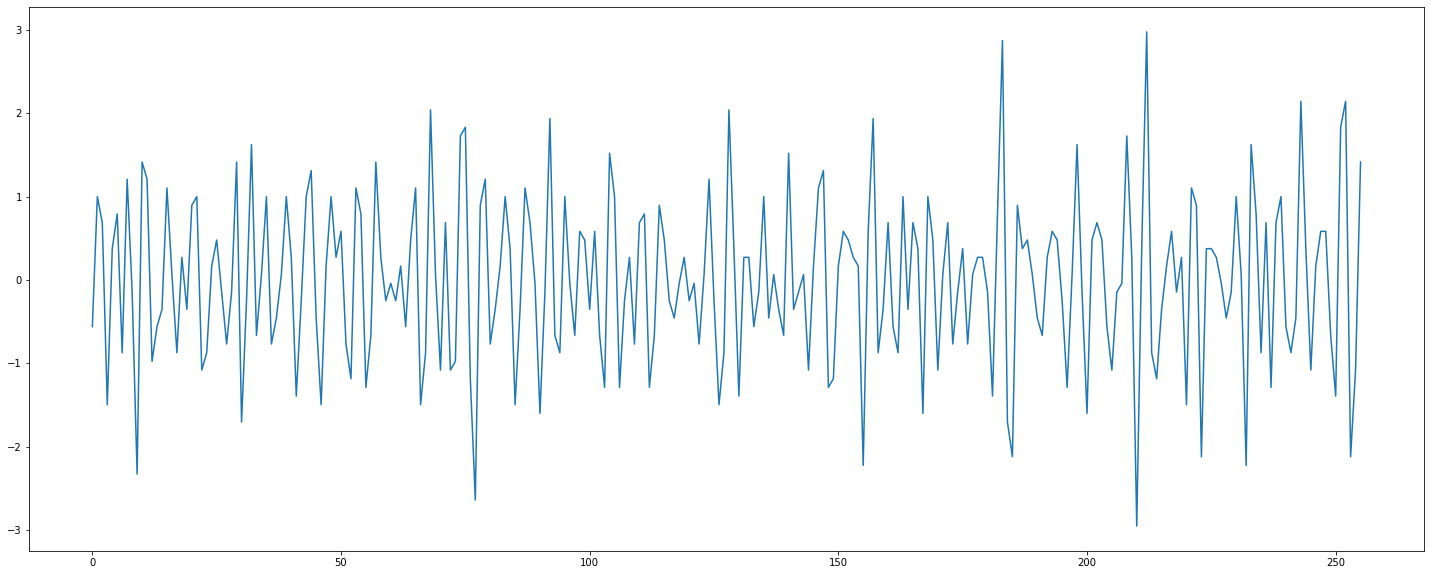

In [112]:
import matplotlib.pyplot as plt
plt.plot(x)

In [113]:
y32 = fft(x, n = 32)
y16 = fft(x, n = 16)
y8 = fft(x, n = 8)

In [115]:
rx32 = ifft(y32, n = 256)
rx16 = ifft(y16, n = 256)
rx8 = ifft(y8, n = 256)

In [116]:
plt.rcParams['figure.figsize'] = [25, 10]

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


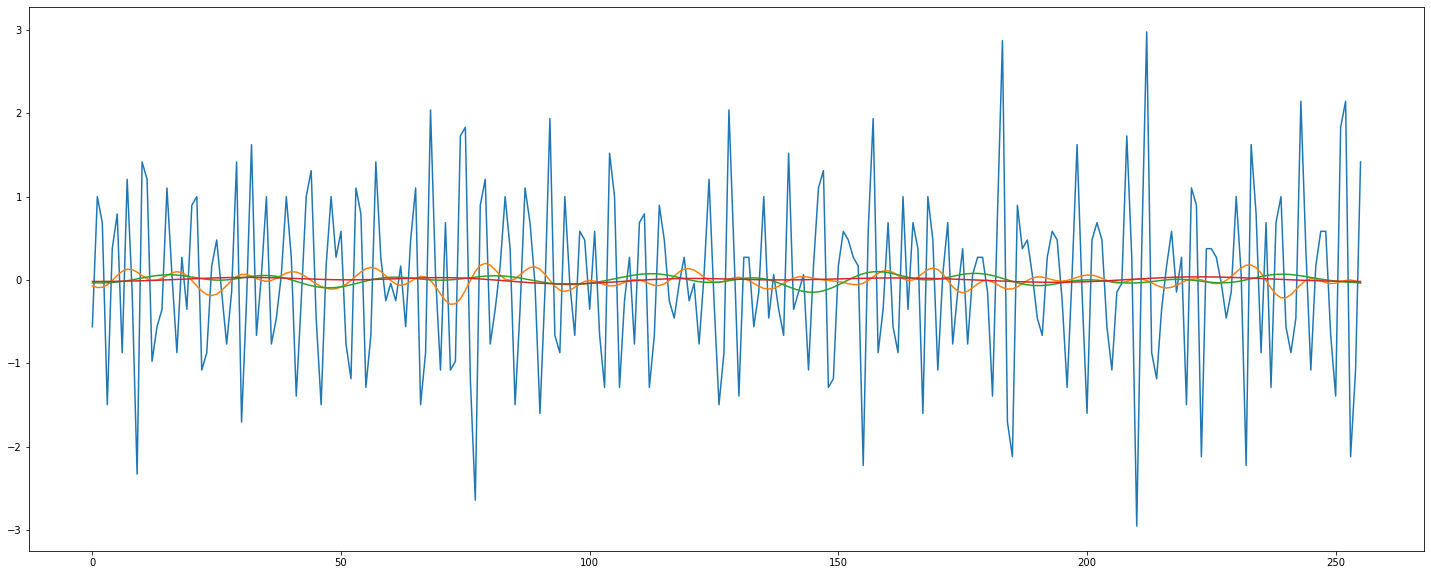

In [117]:
t = range(256)
plt.plot(t,x,t,rx32,t,rx16,t,rx8)

In [120]:
euc_dist(x, rx32), euc_dist(x, rx16), euc_dist(x, rx8)

(16.111264021337362, 16.040854123013805, 16.012064466012554)